### Modul Pembelajaran: Analisis dan Visualisasi Spektrum Frekuensi Audio menggunakan Fast Fourier Transform (FFT)

#### Pendahuluan

Dalam modul ini, kita akan mempelajari cara menganalisis dan memvisualisasikan komponen frekuensi dari sebuah sinyal audio menggunakan **Fast Fourier Transform (FFT)**. FFT adalah alat matematis yang kuat yang memungkinkan kita untuk mengonversi sinyal dalam domain waktu (seperti gelombang audio) menjadi representasi dalam domain frekuensi. Ini sangat berguna untuk memahami konten spektral dari audio dan merupakan dasar dari aplikasi seperti **equalizer audio**.

#### Teori Dasar

- **Transformasi Fourier (Fourier Transform)**: Transformasi Fourier adalah operasi matematika yang mengubah sinyal dari domain waktu ke domain frekuensi. Dalam domain waktu, sinyal biasanya direpresentasikan sebagai fungsi dari waktu, dan Transformasi Fourier memecahnya menjadi sinusoid penyusunnya, memberikan spektrum frekuensi.

- **Fast Fourier Transform (FFT)**: FFT adalah algoritma efisien untuk menghitung Discrete Fourier Transform (DFT) dan inversnya. FFT mengurangi kompleksitas perhitungan DFT dari O(n²) menjadi O(n log n), membuatnya lebih praktis untuk digunakan dalam pemrosesan sinyal digital.

- **Spektrum Frekuensi**: Ketika kita menerapkan FFT pada sinyal audio, kita memperoleh spektrum frekuensi yang menunjukkan seberapa banyak setiap frekuensi hadir dalam sinyal tersebut. Spektrum ini sangat penting untuk memvisualisasikan sinyal audio dalam domain frekuensi, mirip dengan equalizer audio.

#### Langkah-Langkah Praktis

Mari kita lanjutkan dengan kode yang telah diberikan dan memahami setiap bagiannya.

#### Langkah 1: Memuat dan Mempersiapkan Data Audio

Pertama, kita akan memuat file audio dan memangkas data audio untuk 30 detik pertama.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

# Load dan trim data audio
file_path = os.path.join(os.getcwd(), 'data', 'ImperialMarch60.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_content = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
    if n_channels > 1:
        audio_data = audio_data.reshape(-1, n_channels)

# Trim data audio untuk 30 detik pertama
start_time = 0
end_time = 30

start_sample = int(start_time * framerate)
end_sample = int(end_time * framerate)

audio_data = audio_data[start_sample:end_sample]

# Untuk audio stereo, pilih hanya satu channel untuk analisis
if n_channels > 1:
    audio_data = audio_data[:, 0]

**Penjelasan**:
- **Memuat File Audio**: Menggunakan modul `wave`, kita memuat file audio yang kemudian dibaca ke dalam buffer sebagai data digital (`audio_data`).
- **Pemangkasan Data Audio**: Kita membatasi analisis hanya untuk 30 detik pertama dari audio untuk mempercepat proses.

#### Langkah 2: Menerapkan Fast Fourier Transform (FFT)

**Cara Manual**



In [12]:
short_audio_data = audio_data[:44100]

In [13]:
# Calculate frequencies using FFT formula
frequencies = np.fft.fftfreq(len(short_audio_data), 1 / framerate)
t = np.arange(0, len(short_audio_data) / framerate, 1 / framerate)

# Prepare to store magnitudes
magnitudes = []

# Loop over positive frequencies only (skip negative frequencies)
for freq in frequencies[:len(frequencies) // 2]:
    cos_component = np.cos(2 * np.pi * freq * t)
    sin_component = np.sin(2 * np.pi * freq * t)
    
    real_part = np.sum(short_audio_data * cos_component)
    imag_part = np.sum(short_audio_data * sin_component)
    
    magnitude = np.sqrt(real_part**2 + imag_part**2)
    magnitudes.append(magnitude)

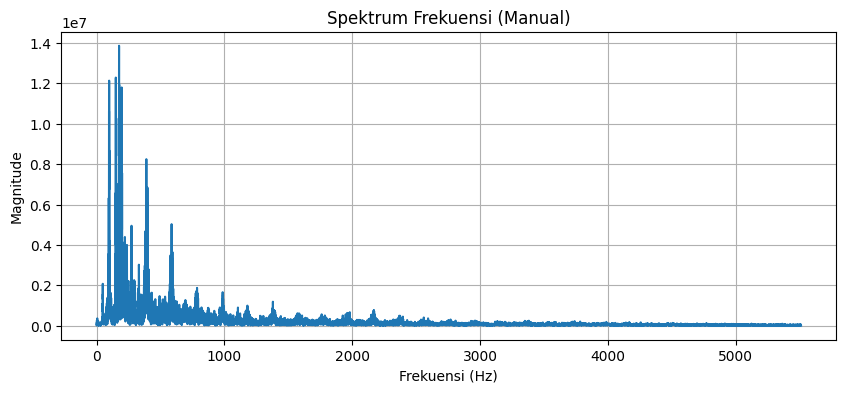

In [16]:
n = len(magnitudes)
# Plot spektrum frekuensi
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:n // 2], magnitudes[:n // 2])
plt.title('Spektrum Frekuensi (Manual)')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Selanjutnya, kita akan menerapkan FFT pada data audio yang telah dipangkas. Untuk mempermudah, kita akan menggunakan fungsi bawaan dari modul `numpy` untuk menghitung FFT.

In [2]:
# Menerapkan FFT pada data audio
fft_data = np.fft.fft(audio_data)

# Menghitung frekuensi yang sesuai
frequencies = np.fft.fftfreq(len(fft_data), 1 / framerate)

# Menghitung magnitude dari FFT (nilai absolut)
magnitude = np.abs(fft_data)

**Penjelasan**:
- **FFT**: Transformasi ini mengubah sinyal dari domain waktu menjadi domain frekuensi, yang menghasilkan data spektrum frekuensi.
- **Magnitude**: Kita mengambil nilai absolut dari hasil FFT untuk mendapatkan besarnya komponen frekuensi.

#### Langkah 3: Memvisualisasikan Spektrum Frekuensi

Visualisasi pertama dari spektrum frekuensi menggunakan sumbu frekuensi linear.

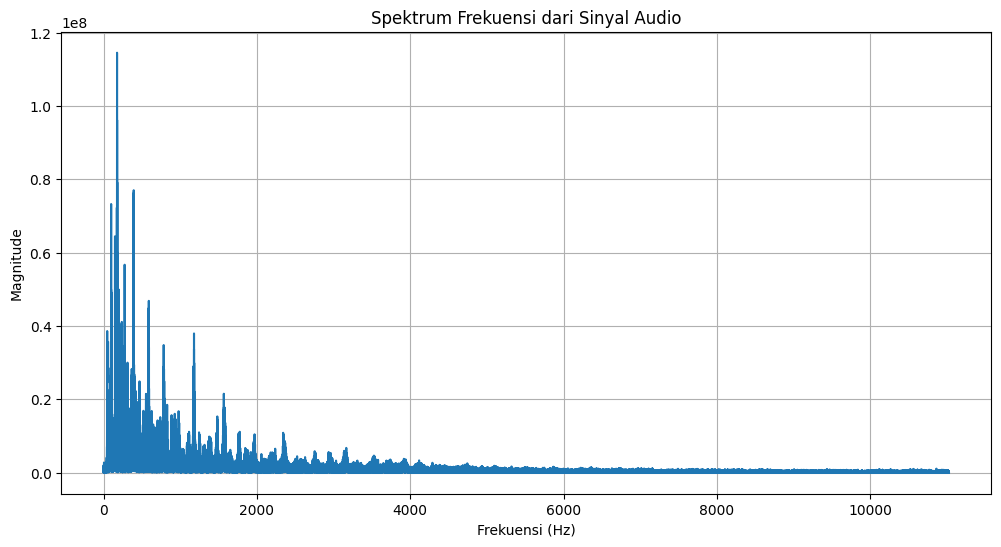

In [3]:
# Hanya mempertimbangkan frekuensi positif (simetri pada keluaran FFT)
positive_freqs = frequencies[:len(frequencies) // 2]
positive_magnitude = magnitude[:len(magnitude) // 2]

# Plot spektrum frekuensi
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title('Spektrum Frekuensi dari Sinyal Audio')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

**Penjelasan**:
- **Frekuensi Positif**: FFT menghasilkan spektrum frekuensi simetris, sehingga kita hanya mempertimbangkan bagian positif untuk visualisasi.
- **Plot Spektrum**: Plot ini menunjukkan representasi dasar dari distribusi frekuensi dalam sinyal audio.

#### Langkah 4: Memuluskan Spektrum Frekuensi

Kita akan memuluskan spektrum frekuensi untuk membuat visualisasi yang lebih halus.

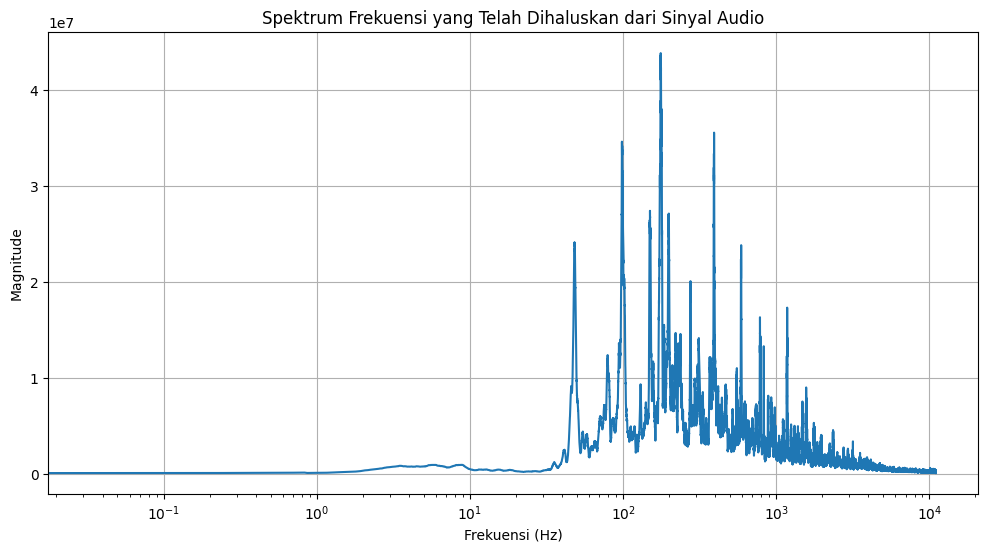

In [4]:
# Fungsi smoothing menggunakan rata-rata bergerak sederhana
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Terapkan smoothing pada magnitude
smoothed_magnitude = smooth(positive_magnitude, box_pts=50)

# Plot spektrum frekuensi yang telah dihaluskan dengan sumbu frekuensi logaritmik
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, smoothed_magnitude)
plt.xscale('log')
plt.title('Spektrum Frekuensi yang Telah Dihaluskan dari Sinyal Audio')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

**Penjelasan**:
- **Smoothing**: Digunakan untuk mengurangi variasi tajam pada spektrum frekuensi, membuatnya lebih mulus.
- **Sumbu Frekuensi Logaritmik**: Sumbu logaritmik lebih sesuai dengan persepsi manusia terhadap frekuensi, terutama untuk spektrum audio.

#### Langkah 5: Memperindah Visualisasi Spektrum (Mirip dengan Equalizer DAW)

Untuk membuat spektrum lebih mirip dengan tampilan equalizer di Digital Audio Workstation (DAW), kita akan menambahkan beberapa peningkatan pada visualisasi.

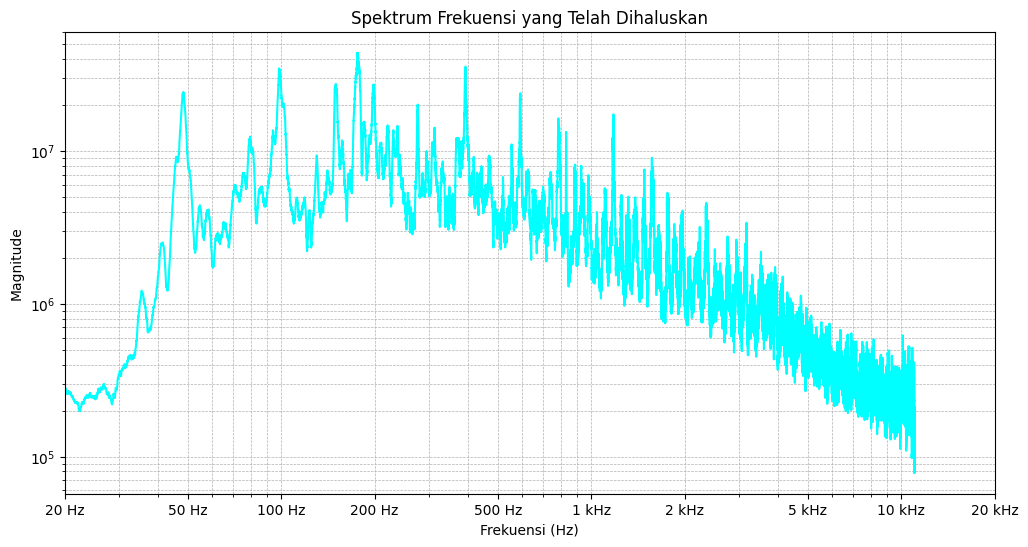

In [6]:
# Plot yang diperindah menyerupai equalizer DAW
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, smoothed_magnitude, color='cyan', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(20, 20000)  # Set the x-axis limits to start from 20 Hz to 20,000 Hz
plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000], 
           ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
plt.title('Spektrum Frekuensi yang Telah Dihaluskan')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Penjelasan**:
- **Label Sumbu X**: Sumbu x diubah agar menampilkan tick yang lebih umum digunakan dalam equalizer grafik, mulai dari 20 Hz hingga 20.000 Hz.
- **Logaritmik Ganda**: Penggunaan skala logaritmik pada kedua sumbu x dan y membantu dalam menonjolkan dinamika frekuensi dan amplitudo yang lebih kecil.
- **Enhancement Visual**: Warna cyan dan garis halus memberikan tampilan yang lebih profesional dan menyerupai equalizer spektrum di DAW.

---

Dengan modul ini, Anda telah mempelajari bagaimana cara memuat, menganalisis, dan memvisualisasikan spektrum frekuensi dari sinyal audio menggunakan FFT. Visualisasi akhir yang telah diperindah memberikan tampilan spektrum frekuensi yang lebih realistis dan sesuai dengan standar industri audio profesional.